In [674]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [675]:
#Load the dataset
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [676]:
df.shape

(200, 5)

In [677]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [678]:
#Dropping unimportant variables
df=df.drop('CustomerID', axis=1)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [679]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


<Axes: >

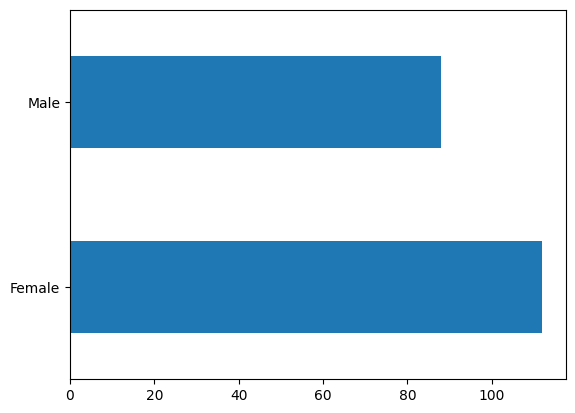

In [680]:
df['Genre'].value_counts().plot(kind='barh')

<Axes: ylabel='Density'>

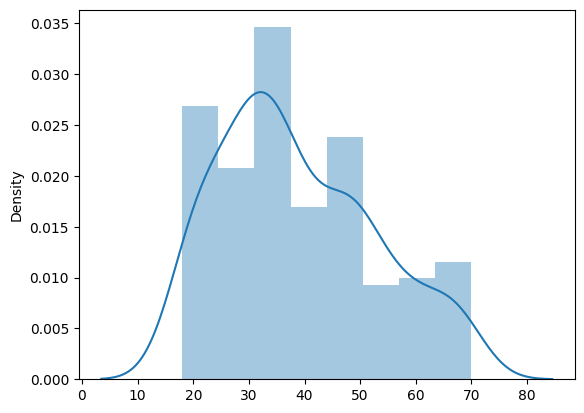

In [681]:
#Distribution of Age datapoints.
sns.distplot(x=df['Age'])

<Axes: ylabel='Density'>

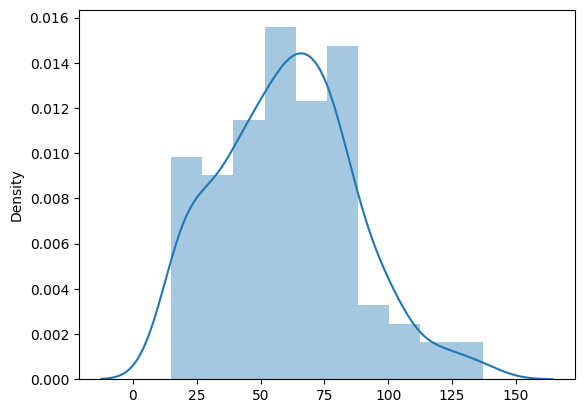

In [682]:
sns.distplot(x=df['Annual Income (k$)'])

<Axes: ylabel='Density'>

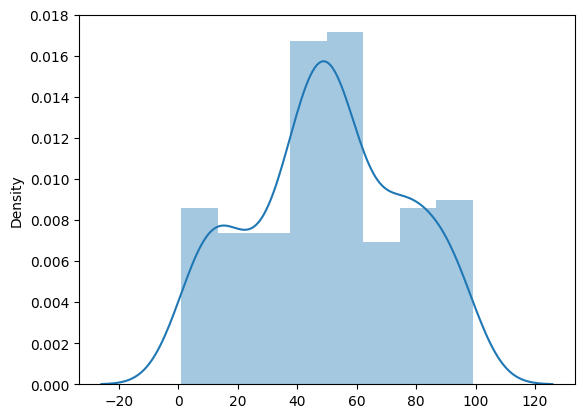

In [683]:
sns.distplot(x=df['Spending Score (1-100)'])

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

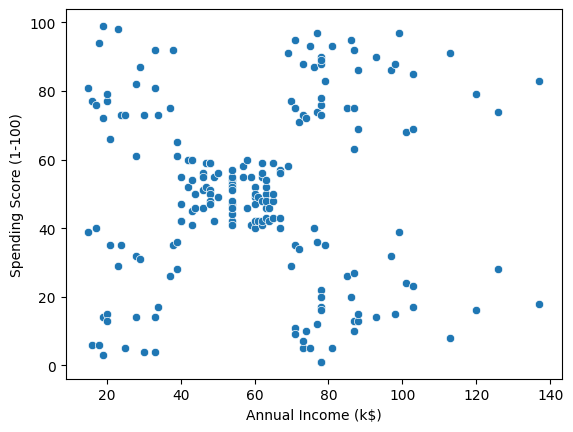

In [684]:
#Distribution of Annual Income vs Spending Score.
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])

In [685]:
#Encoding Gender values
df['Genre']=pd.get_dummies(df['Genre'], drop_first=True)

In [686]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [687]:
#Calculating WCSS(Within Cluster Sum of Square of distnaces) to find optimal number od clusters.
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

print(wcss)

[308862.06000000006, 212889.44245524303, 143391.59236035676, 104422.83498539751, 75399.61541401484, 58348.641363315044, 51458.2909741209, 44357.32664902663, 40671.10573497934, 37119.16974887127]


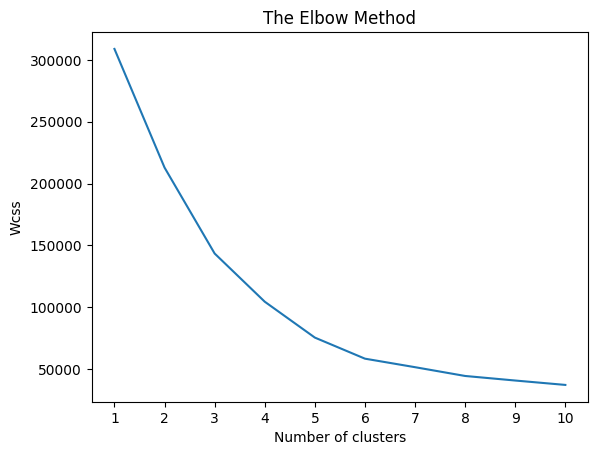

In [688]:
#Plotting ELBOW Curve.
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()

The Optimal number of clusters would be 5 after looking at ELBOW Curve.

In [689]:
#Modelling
model=KMeans(n_clusters=5, init='k-means++')
y_kmeans=model.fit_predict(df)
print(y_kmeans)

[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 4 2 3 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 3 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [702]:
# Evaluating the model
from sklearn.metrics import silhouette_score
sc=silhouette_score(df, y_kmeans)
print(sc)

0.4447077184951981

In [690]:
df['Cluster']=pd.DataFrame(y_kmeans)
df['Cluster'] = pd.Categorical(df['Cluster'])
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,1
1,1,21,15,81,0
2,0,20,16,6,1
3,0,23,16,77,0
4,0,31,17,40,1


<Axes: >

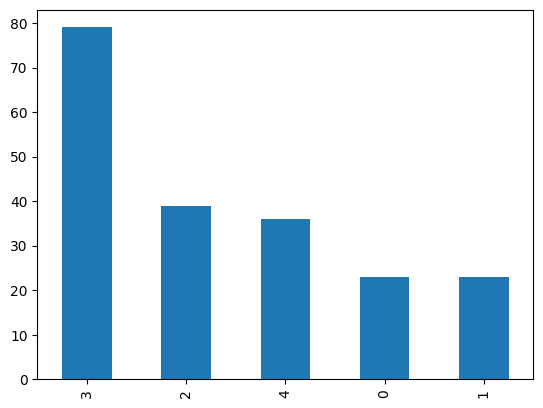

In [692]:
# Clusters distribution.
df['Cluster'].value_counts().plot(kind='bar')

In [693]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,1
1,1,21,15,81,0
2,0,20,16,6,1
3,0,23,16,77,0
4,0,31,17,40,1


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

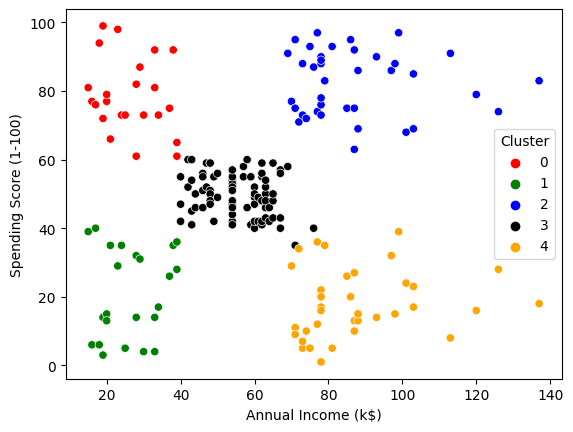

In [694]:
#visualize the plot with different variables of all clusters.
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette=["red", "green", 'blue', 'black', 'orange'])

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

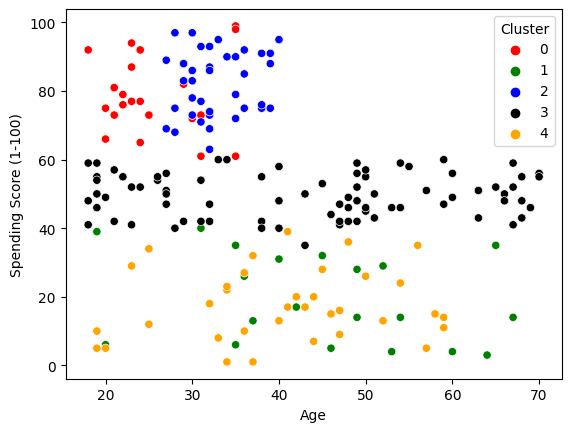

In [695]:
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette=["red", "green", 'blue', 'black', 'orange'])

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

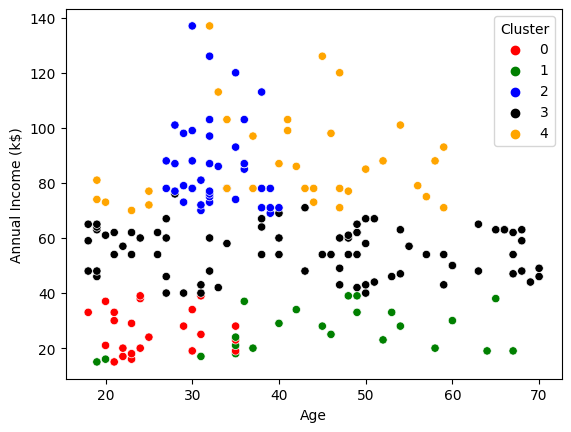

In [696]:
sns.scatterplot(y=df['Annual Income (k$)'], x=df['Age'], hue=df['Cluster'], palette=["red", "green", 'blue', 'black', 'orange'])

<Axes: xlabel='Cluster', ylabel='Age'>

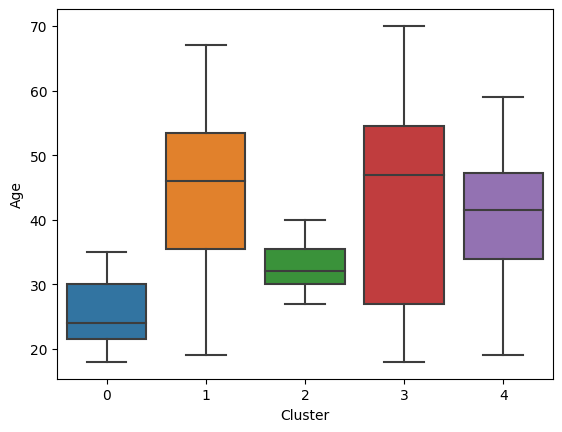

In [697]:
#Age in each cluster
sns.boxplot(x=df['Cluster'], y=df['Age'])

<Axes: xlabel='Cluster', ylabel='Annual Income (k$)'>

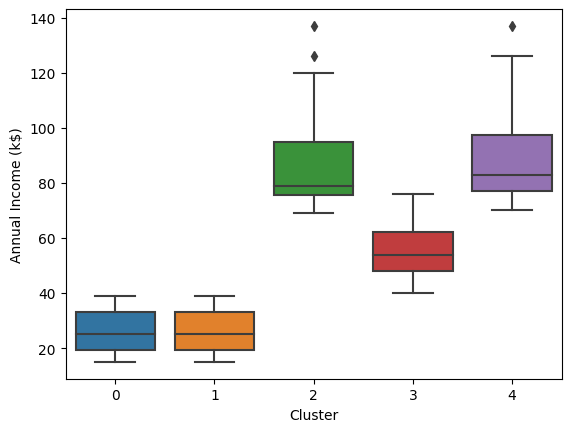

In [698]:
#Annual Income in each cluster
sns.boxplot(x=df['Cluster'], y=df['Annual Income (k$)'])

<Axes: xlabel='Cluster', ylabel='Spending Score (1-100)'>

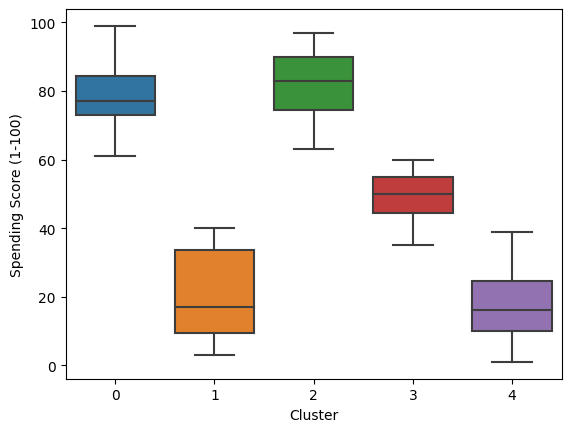

In [699]:
#Spending score in each cluster
sns.boxplot(x=df['Cluster'], y=df['Spending Score (1-100)'])